In [51]:
import torch
a=torch.ones(3)
a

tensor([1., 1., 1.])

In [52]:
a[1]

tensor(1.)

In [53]:
float(a[1])


1.0

In [54]:
points=torch.tensor([[4.0,1.0],[5.0,3.0],[2.0,1.0]])

In [55]:
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [56]:
points.shape

torch.Size([3, 2])

In [57]:
some_list = list(range(6))
some_list[:]
some_list[1:4]
some_list[1:]
some_list[:4]
some_list[:-1]
some_list[1:4:2]
points[1:]
points[1:,:]
points[1:,0]
points.unsqueeze(1)

tensor([[[4., 1.]],

        [[5., 3.]],

        [[2., 1.]]])

In [58]:
img_t=torch.randn(3,5,5)
weights=torch.tensor([0.2126,0.7152,0.0722])
batch_t=torch.randn(2,3,5,5)

In [59]:
img_gray_naive=img_t.mean(-3)
batch_gray_naive=batch_t.mean(-3)
img_gray_naive.shape

torch.Size([5, 5])

In [60]:
unsqueezed_weights=weights.unsqueeze(-1).unsqueeze(-1)
img_weights=(img_t*unsqueezed_weights)
barch_weights=(batch_t*unsqueezed_weights)
umg_gray_weighted=img_weights.sum(-3)
barch_gray_weighted=barch_weights.sum(-3)
barch_weights.shape,batch_t.shape,unsqueezed_weights.shape

(torch.Size([2, 3, 5, 5]), torch.Size([2, 3, 5, 5]), torch.Size([3, 1, 1]))

In [61]:
weights_named=torch.tensor([0.2126,0.7152,0.0722],names=['channels'])
weights_named

tensor([0.2126, 0.7152, 0.0722], names=('channels',))

In [62]:
img_named=img_t.refine_names(...,'channels','rows','columns')
batch_named=batch_t.refine_names(...,'channels','rows','columns')
print("img named:",img_named.shape,img_named.names)
print("batch named:",batch_named.shape,batch_named.names)


img named: torch.Size([3, 5, 5]) ('channels', 'rows', 'columns')
batch named: torch.Size([2, 3, 5, 5]) (None, 'channels', 'rows', 'columns')


In [63]:
weights_aligned=weights_named.align_as(img_named)
weights_aligned.shape,weights_aligned.names

(torch.Size([3, 1, 1]), ('channels', 'rows', 'columns'))

In [64]:
gray_named=(img_named*weights_aligned).sum('channels')
gray_named.shape,gray_named.names

(torch.Size([5, 5]), ('rows', 'columns'))

In [65]:
a=torch.tensor([[1,2],[3,4]])
b=torch.tensor([1,2])
a+b

tensor([[2, 4],
        [4, 6]])

In [66]:
points=torch.tensor([[4.0,1.0],[5.0,3.0],[2.0,1.0]])
points.storage

<bound method Tensor.storage of tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])>

In [67]:
points_storage = points.storage()
points_storage[0]

4.0

In [68]:
points.storage()[1]

1.0

In [69]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_storage = points.storage()
points_storage[0] = 2.0
points

tensor([[2., 1.],
        [5., 3.],
        [2., 1.]])

In [70]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
print(second_point.storage_offset())


2


In [71]:
second_point

tensor([5., 3.])

In [72]:
def get_points_stride():
    """
    返回点张量的步长。

    张量的步长表示在遍历张量时在每个维度上前进的元素数量。
    它是一个元组，指示在每个维度上跳过的元素数量以移动到下一个元素。

    返回值:
    - stride (tuple): 点张量的步长。
    """
    return points.stride()
points.stride()

(2, 1)

In [73]:
second_point = points[1]
second_point.size()

torch.Size([2])

In [74]:
second_point.storage_offset()

2

In [75]:
second_point.shape

torch.Size([2])

In [76]:
second_point.stride()

(1,)

In [77]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
second_point[0] = 10.0
points

tensor([[ 4.,  1.],
        [10.,  3.],
        [ 2.,  1.]])

In [78]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1].clone()
second_point[0] = 10.0
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [79]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_t = points.t()
print(points)
print(points_t)

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
tensor([[4., 5., 2.],
        [1., 3., 1.]])


In [80]:
print(id(points.storage()) == id(points_t.storage()))
print(points.stride(), points_t.stride())

False
(2, 1) (1, 2)


In [81]:
points_t.storage()

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [82]:

some_t = torch.arange(1, 61).reshape(3, 4, 5)
transpose_t = some_t.transpose(0, 2)
# 使用transpose方法对some_t进行转置操作
transpose_t = some_t.transpose(0, 2)

# 打印转置后的张量形状
print(transpose_t.shape)

torch.Size([5, 4, 3])


In [83]:
transpose_t 


tensor([[[ 1, 21, 41],
         [ 6, 26, 46],
         [11, 31, 51],
         [16, 36, 56]],

        [[ 2, 22, 42],
         [ 7, 27, 47],
         [12, 32, 52],
         [17, 37, 57]],

        [[ 3, 23, 43],
         [ 8, 28, 48],
         [13, 33, 53],
         [18, 38, 58]],

        [[ 4, 24, 44],
         [ 9, 29, 49],
         [14, 34, 54],
         [19, 39, 59]],

        [[ 5, 25, 45],
         [10, 30, 50],
         [15, 35, 55],
         [20, 40, 60]]])

In [84]:
transpose_t.stride()


(1, 5, 20)

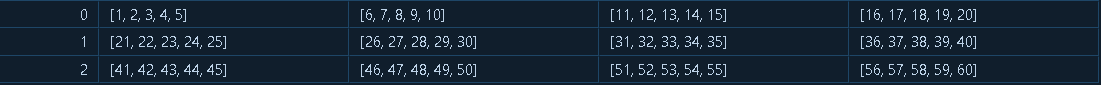
(i,j,k)到(i+1,j,k)之间跨越的元素表示第i个维度的步长


In [85]:
transpose_t.stride()

(1, 5, 20)

In [86]:
points.is_contiguous()

True

In [87]:
points_t.is_contiguous()

False

In [88]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_t = points.t()
points_t

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [89]:
points_t.storage()
points.storage()

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [90]:
points_t.stride()
points.stride()

(2, 1)

In [91]:
points_t_cont = points_t.contiguous()
points_t_cont

tensor([[4., 5., 2.],
        [1., 3., 1.]])

In [92]:
points_t_cont.storage()

 4.0
 5.0
 2.0
 1.0
 3.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [93]:
"""
这段代码演示了在PyTorch中使用`torch.short`函数的用法。

`torch.short`是PyTorch中的一个函数，它创建一个数据类型为`torch.short`（16位有符号整数）的张量。

它接受一个输入张量，并返回一个具有相同数据但指定数据类型的新张量。

在给定的代码中，`torch.short`被用来创建一个形状为(2, 2)、数据类型为`torch.short`的张量`short_points`。

该张量被初始化为值为[[1, 2], [3, 4]]的数据。

代码还使用`dtype`属性打印了`short_points`张量的数据类型。

注意：`torch.short`函数等同于`torch.int16`和`torch.int`。
"""

double_points = torch.ones(10, 2, dtype=torch.double)
short_points = torch.tensor([[1, 2], [3, 4]], dtype=torch.short)
short_points.dtype


torch.int16

In [94]:
import torch


double_points = torch.zeros(10, 2).double()
short_points = torch.ones(10, 2).short()

In [95]:
double_points = torch.zeros(10, 2).to(torch.double)
short_points = torch.ones(10, 2).to(dtype=torch.short)

In [96]:
points_64 = torch.rand(5, dtype=torch.double)  # <1>
#torch.rand函数，这个函数生成了一个具有指定形状的张量，其元素值在0到1之间均匀分布
points_short = points_64.to(torch.short)
points_64 * points_short  # works from PyTorch 1.3 onwards

tensor([0., 0., 0., 0., 0.], dtype=torch.float64)

In [97]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])

In [98]:
some_list = list(range(6))

print(some_list[:])     # <1>
print(some_list[1:4])   # <2>
print(some_list[1:])    # <3>
print(some_list[:4])    # <4>
print(some_list[:-1])   # <5>
print(some_list[1:4:2]) # <6>

[0, 1, 2, 3, 4, 5]
[1, 2, 3]
[1, 2, 3, 4, 5]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[1, 3]


In [108]:
print(points[1:])       # <1>
print(points[1:, :])    # <2>
print(points[1:, 0])    # <3>
print(points[None])     # <4>
points

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([1., 1.])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [109]:
points = torch.ones(3, 4)
points_np = points.numpy()
points_np

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [104]:
points = torch.from_numpy(points_np)
points.dtype

torch.float32

In [110]:
torch.save(points, '../data/p1ch3/ourpoints.txt')